# Generador de l'ecuyer

Imagina que quieres crear una lista de números aleatorios, pero no tienes ningún dado o moneda para tirar y obtener un resultado aleatorio. En su lugar, puedes usar un programa de ordenador que genera números "pseudoaleatorios". Estos números no son realmente aleatorios, pero pueden parecerlo si se hacen correctamente.

El generador de L'Ecuyer es una manera de generar números pseudoaleatorios. Utiliza dos fórmulas matemáticas para producir una lista de números que parecen aleatorios. Las fórmulas son como un "juego matemático" que usa dos números especiales llamados "semillas" para crear una serie de números. Cada número generado se calcula a partir del número anterior.

Los generadores lineales congruentes son un tipo de fórmula que se utiliza en el generador de L'Ecuyer. Una fórmula lineal congruente es como un "truco matemático" que toma un número inicial (la semilla), lo multiplica por otro número (a), le suma otro número (c) y toma el resultado módulo de un tercer número (m). La fórmula se escribe así:

Xn+1 = (aXn + c) % m

En esta fórmula, Xn es el número anterior de la serie, Xn+1 es el siguiente número, a, c y m son números especiales que se eligen cuidadosamente para obtener una serie de números pseudoaleatorios que parezcan aleatorios.

El generador de L'Ecuyer utiliza dos fórmulas lineales congruentes juntas para generar una serie de números. Cada fórmula tiene su propia semilla, a, c y m. Cuando las dos fórmulas se combinan, se crea una secuencia de números que parecen aleatorios.

El generador de L'Ecuyer es una herramienta matemática que usa dos fórmulas llamadas generadores lineales congruentes para crear una serie de números pseudoaleatorios. Cada fórmula tiene su propia semilla, que es como un número de inicio. Cuando se combinan, las fórmulas crean una serie de números que parecen aleatorios.x

Generador de L'Ecuyer

El generador de L'Ecuyer utiliza dos GLC con parámetros cuidadosamente elegidos para garantizar que la secuencia resultante tenga propiedades estadísticas deseables, como una distribución uniforme y una correlación baja entre los números generados. Además, el generador de L'Ecuyer tiene un periodo largo, lo que significa que puede generar una gran cantidad de números pseudoaleatorios antes de que se repita la secuencia.

La fórmula para el generador de L'Ecuyer es la siguiente:

X[n+1] = (a * X[n] + c) % m

Y[n+1] = (a * Y[n] + c) % m

Z[n+1] = (X[n+1] - Y[n+1]) % m

En esta fórmula, $X_n$ y $Y_n$ son los números anteriores de las dos series de GLC, $a_1$, $a_2$, $c_1$, $c_2$, $m_1$ y $m_2$ son los parámetros cuidadosamente elegidos y $Z_{n+1}$ es el número pseudoaleatorio resultante. La elección de los parámetros se realiza de manera que las secuencias de números generados tengan una buena calidad estadística.

Conclusión
En resumen, el generador de L'Ecuyer es un método para generar números pseudoaleatorios mediante la combinación de dos generadores lineales congruentes, que se basa en la elección cuidadosa de parámetros para garantizar propiedades estadísticas deseables. El generador de L'Ecuyer se utiliza en aplicaciones de simulación y optimización donde se requiere una secuencia de números pseudoaleatorios que parezcan aleatorios.

In [32]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
import scipy.stats

In [8]:
#Creamos la primera columna (i)
col_i = pd.DataFrame({'num': range(1,501)})
col_i

,num
0,1
1,2
2,3
3,4
4,5
...,...
495,496
496,497
497,498
498,499


In [9]:
#Columna 2 (Ui), número aleatorio uniforme entre 0 y 1

ui = [random.uniform(0,1)for i in range(500)]
tabla = pd.DataFrame(col_i)
tabla ['Ui'] = ui 
tabla

,num,Ui
0,1,0.190265
1,2,0.819632
2,3,0.325263
3,4,0.550550
4,5,0.814482
...,...,...
495,496,0.773964
496,497,0.419321
497,498,0.499813
498,499,0.451127


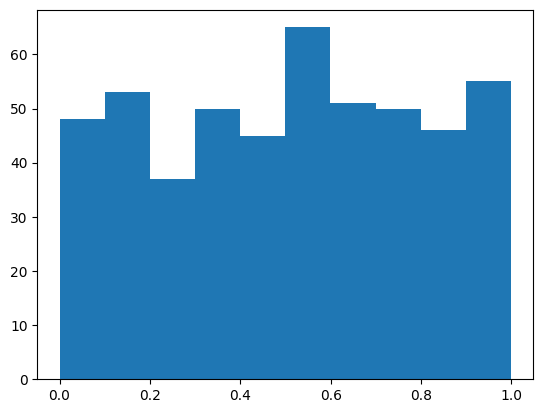

In [10]:
#Revisamos que tan uniforme fue el ejercicio anterior ploteandolo

plt.hist(ui)
plt.show()

In [11]:
#Agregamos columna de limite inferior y superiorior

lim_inf = []
lim_sup = []

for i in range(100):                  #solo debe de haber 100 intervalos
    inferior = i/100
    superior = (inferior + .01)
    lim_inf.append(inferior)
    lim_sup.append(superior)

limites = pd.DataFrame({'Limite inferior' : lim_inf,
                        'Limite superior' : lim_sup})

limites

,Limite inferior,Limite superior
0,0.00,0.01
1,0.01,0.02
2,0.02,0.03
3,0.03,0.04
4,0.04,0.05
...,...,...
95,0.95,0.96
96,0.96,0.97
97,0.97,0.98
98,0.98,0.99


In [18]:
tabla ['Limite inferior'] = limites['Limite inferior']
tabla ['Limite superior'] = limites['Limite superior']
tabla[95:105]

,num,Ui,Limite inferior,Limite superior
95,96,0.564393,0.95,0.96
96,97,0.378956,0.96,0.97
97,98,0.114644,0.97,0.98
98,99,0.883786,0.98,0.99
99,100,0.553978,0.99,1.00
100,101,0.415082,NaN,NaN
101,102,0.517139,NaN,NaN
102,103,0.098966,NaN,NaN
103,104,0.801246,NaN,NaN
104,105,0.002528,NaN,NaN


In [19]:
#Esta función de numpy nos retorna el conteo de nuestros números aleatorios ó fecuencia (fi) por cada intervalo
fi, intervals = np.histogram(ui, range=(0,1), bins=100)    
fi

array([ 8,  4,  4,  0,  9,  5,  5,  4,  6,  3,  7,  3,  3, 12,  5,  3,  0,
        5,  9,  6,  3,  4,  8,  4,  3,  2,  7,  2,  3,  1,  5,  4,  4,  4,
        3,  4,  9,  9,  4,  4,  6,  6,  5,  6,  5,  3,  0,  4,  5,  6,  4,
       14,  6,  6,  4,  7,  8,  6,  5,  4,  8,  3,  8,  5,  5,  6,  4,  6,
        5,  1,  2,  5,  5,  6,  6,  2, 10,  6,  4,  4,  7,  4,  8,  5,  5,
        3,  3,  3,  4,  4,  7,  6,  5,  7,  7,  5, 10,  1,  2,  5],
      dtype=int64)

In [22]:
tabla['fi'] = pd.DataFrame({'fi':fi})
tabla

,num,Ui,Limite inferior,Limite superior,fi
0,1,0.190265,0.00,0.01,8.0
1,2,0.819632,0.01,0.02,4.0
2,3,0.325263,0.02,0.03,4.0
3,4,0.550550,0.03,0.04,0.0
4,5,0.814482,0.04,0.05,9.0
...,...,...,...,...,...
495,496,0.773964,NaN,NaN,NaN
496,497,0.419321,NaN,NaN,NaN
497,498,0.499813,NaN,NaN,NaN
498,499,0.451127,NaN,NaN,NaN


In [26]:
#Entonces en el ejemplo anterior:
n = 500 #escenarios
k = 100 #intervalos

n_k= n/k
n_k

5.0

Recordemos que para l'ecuyer y que sea viable, existe la siguiente condición:

k >= 100

n/k >=5

n/k= nos dice el promedio que deberían caer por cada sub intervalo, es decir por cada subintervalo deberían caer de manera uniforme 5 por cada uno.
Esto nos ayuda a ver que tan bueno es el generador y uniforme

En el caso del presente generador, entonces, nos indicaría que no es bueno al tener más de 400 escenarios cargados en un solo intervalo.

PARA CALCULAR LA FRECUENCIA (ESPERADA) DE NUESTRO GENERADOR:

($f_i$ - n/k)**2

In [27]:
#Calculamos la frecuencia esperada o desviaciones, lo ideal es que todas fueran 0:

fq_esp = []

for i in range(500):
    fq = ((tabla.loc[i,'fi'] - n_k)**2)
    fq_esp.append(fq)

tabla ['Frecuencia esperada'] = fq_esp
tabla

,num,Ui,Limite inferior,Limite superior,fi,Frecuencia esperada
0,1,0.190265,0.00,0.01,8.0,9.0
1,2,0.819632,0.01,0.02,4.0,1.0
2,3,0.325263,0.02,0.03,4.0,1.0
3,4,0.550550,0.03,0.04,0.0,25.0
4,5,0.814482,0.04,0.05,9.0,16.0
...,...,...,...,...,...,...
495,496,0.773964,NaN,NaN,NaN,NaN
496,497,0.419321,NaN,NaN,NaN,NaN
497,498,0.499813,NaN,NaN,NaN,NaN
498,499,0.451127,NaN,NaN,NaN,NaN


### Estadistico de prueba

In [28]:
#sum(tabla['Frecuencia esperada'])*n/k

est_pru = ((tabla['Frecuencia esperada'].sum())/n_k)
est_pru

116.4

### Grados de libertad

In [30]:
grad = k-1
grad

99

### Nivel alpha

In [29]:
alpha = .05

100

In [45]:
chi_cuadrada = scipy.stats.chi2.isf(q=alpha, df=grad)
chi_cuadrada

123.22522145336181

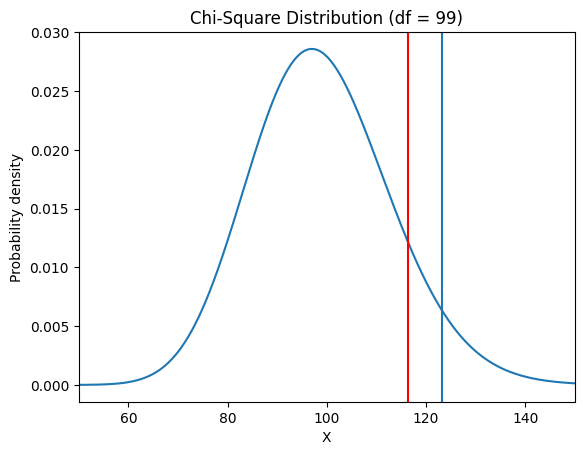

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(40,150,1000)

pdf = stats.chi2.pdf(x, df=grad)

plt.plot(x, pdf)
plt.axvline(x=chi_cuadrada)
plt.axvline(x=est_pru, c='r')
plt.xlim(50,150)
plt.xlabel('X')
plt.ylabel('Probability density')
plt.title('Chi-Square Distribution (df = 99)')
plt.show()


### El estatidisco de prueba (116.4) es menor que la chi cuadrada con 99 grados de libertad y un alpha de 0.05 (123.22). Se puede decir que nuestra distribucón de numeros aleatorios es uniforme al pasar la prueba de la chi cuadrada

HO: Los números son uniformes (0,1)

Ha: Los números NO son uniformes
    
En este caso no podemos rechazar la Ho